## 1. Data Visualization 
### full dataset

emotion
neutral      6868
happiness    5696
surprise      368
sadness       268
anger         252
disgust       208
Name: count, dtype: int64


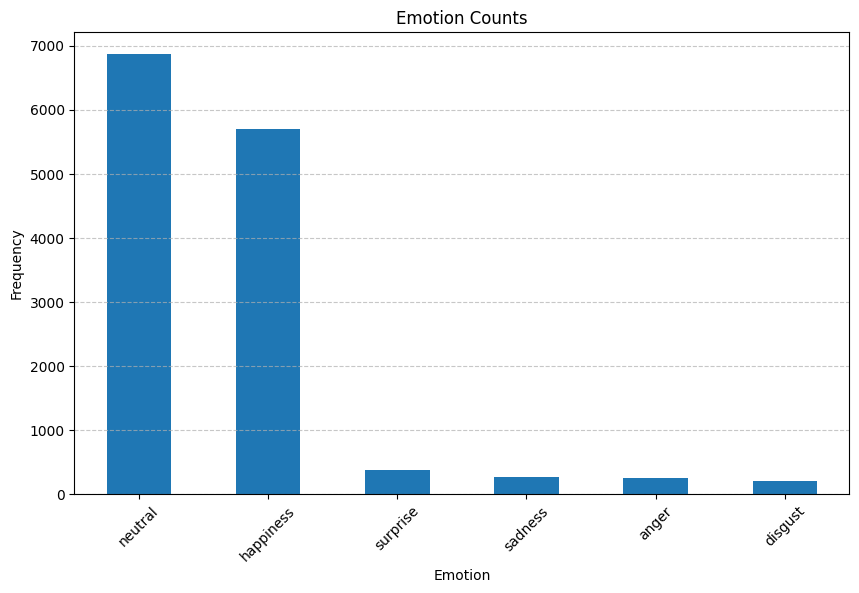

In [52]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('data/legend.csv')

emotion_counts = df['emotion'].value_counts()

print(emotion_counts)

plt.figure(figsize=(10, 6))
emotion_counts.plot(kind='bar')
plt.title('Emotion Counts')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### 1.1 Make sure all lowercase(original dataset counts sadness and SADNESS as different emotion)

In [45]:

#lowercase
df['emotion'] = df['emotion'].str.lower()
#Drop fear and contempt cuz it contains not enough data and i dont think oversampling them or undersampling the other is a good idea
df = df[~df['emotion'].isin(['contempt', 'fear'])]
emotion_counts = df['emotion'].value_counts()
print(emotion_counts)
df.to_csv('legend_modified.csv', index=False)


emotion
neutral      6868
happiness    5696
surprise      368
sadness       268
anger         252
disgust       208
Name: count, dtype: int64


In [46]:
sample_size = 2000
balanced_df = df[df['emotion'].isin(['surprise', 'sadness', 'anger', 'disgust'])]

# Calculate the remaining sample size needed for neutral and happiness
remaining_size = sample_size - len(balanced_df)
target_count = remaining_size // 2

# Randomly sample from neutral and happiness to fill the remaining sample size
neutral_df = df[df['emotion'] == 'neutral'].sample(n=target_count, random_state=42)
happiness_df = df[df['emotion'] == 'happiness'].sample(n=target_count, random_state=42)
balanced_df = pd.concat([balanced_df, neutral_df, happiness_df])
balanced_df.to_csv('sample_2000.csv', index=False)
print('DONE')

DONE


emotion
neutral      452
happiness    452
surprise     368
sadness      268
anger        252
disgust      208
Name: count, dtype: int64


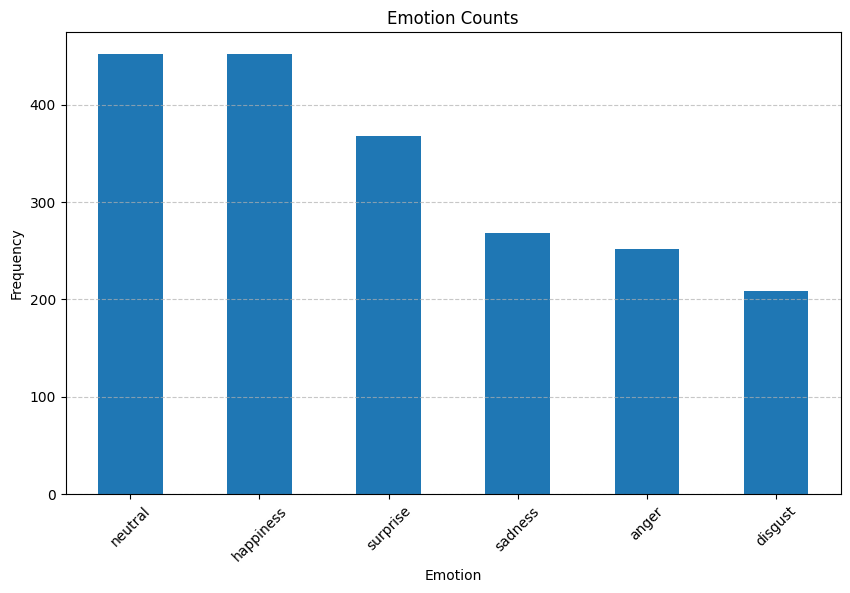

In [47]:
emotion_counts = balanced_df['emotion'].value_counts()
print(emotion_counts)
plt.figure(figsize=(10, 6))
emotion_counts.plot(kind='bar')
plt.title('Emotion Counts')

plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 1.2 select sample set(around 2000 data in total)

In [48]:
from sklearn.utils import resample

sample_size = 2000
emotion_counts = df['emotion'].value_counts()

# Determine the minority and majority emotion types
minority_emotions = emotion_counts[emotion_counts <= sample_size // len(emotion_counts)].index.tolist()
majority_emotions = emotion_counts[emotion_counts > sample_size // len(emotion_counts)].index.tolist()

# Create a balanced sample by oversampling minority classes and sampling from majority classes
balanced_df = pd.DataFrame()
for emotion in minority_emotions:
    emotion_df = df[df['emotion'] == emotion]
    balanced_df = pd.concat([balanced_df, emotion_df])

majority_df = df[df['emotion'].isin(majority_emotions)]
balanced_df = pd.concat([balanced_df, majority_df.sample(n=sample_size - len(balanced_df), random_state=42)])



In [49]:
emotion_counts = balanced_df['emotion'].value_counts()
emotion_counts

emotion
neutral      644
happiness    584
sadness      268
anger        252
disgust      208
surprise      44
Name: count, dtype: int64

### 500_Pics

emotion
happiness    197
anger        115
neutral       84
fear          54
sad           50
Name: count, dtype: int64


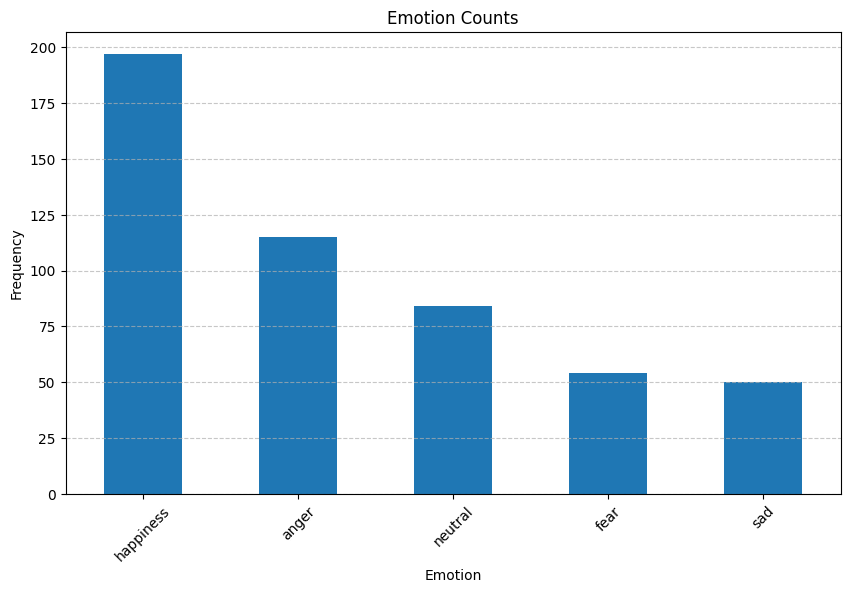

In [50]:
df = pd.read_csv('data\\500_picts_satz.csv')

emotion_counts = df['emotion'].value_counts()

print(emotion_counts)

plt.figure(figsize=(10, 6))
emotion_counts.plot(kind='bar')
plt.title('Emotion Counts')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 2. Train the model

In [51]:
import os
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# Path
csv_file = 'data/500_picts_satz.csv' 
image_dir = 'images/'         

#Read
data = pd.read_csv(csv_file, header=None, names=['user_id', 'image', 'emotion'])

# resize the dataset (I didnt find the resolution of this dataset, so i will resize them to 224x224)
image_size = (224, 224) 
images = []
labels = []
for _, row in data.iterrows():
    image_path = os.path.join(image_dir, row['image'])
    if os.path.exists(image_path):
        img = cv2.imread(image_path)
        img = cv2.resize(img, image_size) / 255.0  
        images.append(img)
        labels.append(row['emotion'])

#convert to numpy arrays
images = np.array(images)
labels = pd.get_dummies(labels).values  

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# CNN model(it is a demo, more evaluation and fine tune is needed)
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  
    layers.Dense(labels.shape[1], activation='softmax')  
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)




c:\Users\Eric\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 230ms/step - accuracy: 0.2456 - loss: 2.5706 - val_accuracy: 0.3125 - val_loss: 1.5471
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 222ms/step - accuracy: 0.3511 - loss: 1.5063 - val_accuracy: 0.3125 - val_loss: 1.5810
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 220ms/step - accuracy: 0.3766 - loss: 1.5185 - val_accuracy: 0.3125 - val_loss: 1.5605
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 219ms/step - accuracy: 0.3919 - loss: 1.4443 - val_accuracy: 0.3125 - val_loss: 1.5609
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 222ms/step - accuracy: 0.4244 - loss: 1.4349 - val_accuracy: 0.3875 - val_loss: 1.5295
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 217ms/step - accuracy: 0.4811 - loss: 1.4066 - val_accuracy: 0.3375 - val_loss: 1.4933
Epoch 7/10
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.4358 - loss: 1.4189

KeyboardInterrupt: 

# Visulize the performance

Test Loss: 1.3521215915679932
Test Accuracy: 0.5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

Classification Report:

              precision    recall  f1-score   support

           0       0.35      0.50      0.42        22
           1       0.00      0.00      0.00        11
           2       0.64      0.84      0.73        44
           3       0.22      0.13      0.17        15
           4       0.00      0.00      0.00         8

    accuracy                           0.50       100
   macro avg       0.24      0.29      0.26       100
weighted avg       0.39      0.50      0.44       100



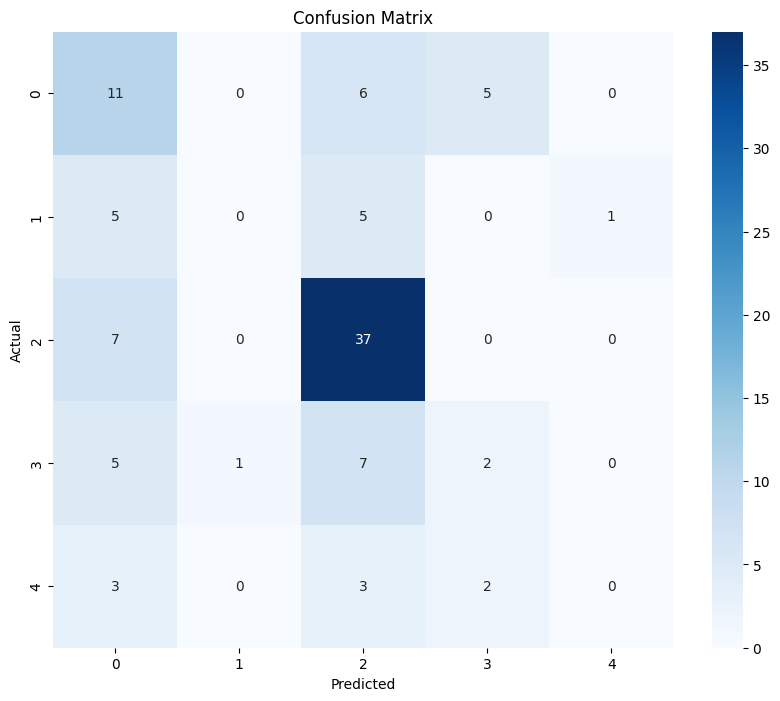

In [5]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Get predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Dynamically fetch the class labels
class_labels = [str(i) for i in range(y_test.shape[1])]  # Use the number of unique classes

# Generate classification report
report = classification_report(y_true_classes, y_pred_classes, target_names=class_labels)
print("\nClassification Report:\n")
print(report)

# Plot confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()